# Plot the xenopus results

For Figure 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'sans-serif')

sns.set_style('white')

import sys

from IPython.display import display

% matplotlib inline

# Read in the results table

TO DO: COMPILE MOST RECENT DATA INTO SUPP TABLES FILE (xenopus_results tab)

In [2]:
pred_df = pd.read_csv('../../manuscript/tables_19_01/ASD_CHD_validation_genes_with_key_with_results.txt',sep='\t')
pred_df.index=pred_df['Symbol']
# xeno_df.head()

# new data from Yuxiao 2/4/20
xeno_df = pd.read_csv('../../manuscript/tables_19_01/200205_ASD-CHD_AOC_YX.txt',sep='\t')
xeno_df.index=xeno_df['Gene Name']
print(len(xeno_df))
xeno_df.head()

27


,Column1,Gene Name,sgRNA Efficiency (Mean),sgRNA Efficiency (StDev),sgRNA_notes,percent_Heart-0,percent_Heart-1,percent_Heart-2,percent_Heart-3,n (Heart),percent_Brain-0,percent_Brain-1,percent_Brain-2,percent_Brain-3,n (Brain)
Gene Name,,,,,,,,,,,,,,,
AGAP1,68,AGAP1,22.65,18.35,NaN,20.00,40.0,40.00,0.00,10.0,16.00,36.00,40.00,8.00,25
ANKRD11,69,ANKRD11,44.97,30.54,NaN,92.50,2.5,2.50,2.50,40.0,35.59,35.59,22.03,6.78,59
CAPN12,70,CAPN12,66.19,24.93,NaN,30.00,60.0,0.00,10.00,10.0,44.44,40.74,14.81,0.00,27
CDK13,71,CDK13,52.60,12.38,NaN,73.33,20.0,6.67,0.00,15.0,26.32,44.74,26.32,2.63,38
CREBBP,73,CREBBP,NaN,NaN,pending,16.67,0.0,16.67,66.67,6.0,0.00,40.00,40.00,20.00,5


In [3]:
pred_df[pred_df['ASD_CHD']==1]

,Symbol,Entrez,ASD_CHD,ASD_only,CHD_only,ASD_seed,CHD_seed,Experimental_results,xenopus_brain_rank,xenopus_heart_rank,xenopus_updated_191204,brain_rank_1204,heart_rank_1204,brain_frac_severe,brain_frac_severe_medium,brain_frac_SMM,heart_frac_severe,heart_frac_severe_medium,heart_frac_SMM,heterotaxy?
Symbol,,,,,,,,,,,,,,,,,,,,
ANKRD11,ANKRD11,29123,1,0,0,0,0,brain,11.0,23.0,brain,12,25.0,7.0,30.0,65.0,2.0,6.0,7.0,NaN
CDK13,CDK13,8621,1,0,0,0,1,none,19.0,25.0,none,21,27.0,2.0,28.0,70.0,0.0,7.0,25.0,NaN
CREBBP,CREBBP,1387,1,0,0,0,0,both,3.0,2.0,both,3,2.0,20.0,59.0,100.0,70.0,80.0,82.0,NaN
KANSL1,KANSL1,284058,1,0,0,0,0,both,4.0,14.0,both,4,16.0,18.0,38.0,82.0,11.0,25.0,79.0,yes
KAT6A,KAT6A,7994,1,0,0,0,0,both,7.0,7.0,both,7,7.0,13.0,19.0,58.0,37.0,36.0,81.0,NaN
KMT2A,KMT2A,4297,1,0,0,0,1,both,5.0,18.0,brain,5,20.0,15.0,42.0,88.0,0.0,49.0,90.0,NaN
KMT2D,KMT2D,8085,1,0,0,0,1,both,16.0,3.0,both,19,3.0,3.0,30.0,47.0,42.0,60.0,100.0,NaN
MAPT,MAPT,4137,1,0,0,0,0,heart,20.0,8.0,heart,22,10.0,0.0,35.0,62.0,22.0,24.0,50.0,NaN
NSD1,NSD1,64324,1,0,0,0,1,both,9.0,6.0,both,10,6.0,9.0,31.0,72.0,31.0,36.0,79.0,yes


In [4]:
# drop MYRF because it is lethal
xeno_df = xeno_df.dropna(subset=['percent_Heart-0'])
print(len(xeno_df))

26


In [5]:
both_predicted = pred_df[pred_df['ASD_CHD']==1].index.tolist()
brain_only_predicted = pred_df[pred_df['ASD_only']==1].index.tolist()
heart_only_predicted = pred_df[pred_df['CHD_only']==1].index.tolist()
# remove MYRF because was lethal, replace RYR2 with RYR1 because that was the tested gene in xenopus (HW says is a good analog)
heart_only_predicted=list(np.setdiff1d(heart_only_predicted,['MYRF','RYR2']))+['RYR1']

# try plotting brain and heart separately
brain_predicted = brain_only_predicted+both_predicted
heart_predicted = heart_only_predicted+both_predicted

In [8]:
xeno_df['brain_predicted']=np.zeros(len(xeno_df))
xeno_df['brain_predicted'].loc[brain_predicted]=1
xeno_df['heart_predicted']=np.zeros(len(xeno_df))
xeno_df['heart_predicted'].loc[heart_predicted]=1
xeno_df.head()

,Column1,Gene Name,sgRNA Efficiency (Mean),sgRNA Efficiency (StDev),sgRNA_notes,percent_Heart-0,percent_Heart-1,percent_Heart-2,percent_Heart-3,n (Heart),percent_Brain-0,percent_Brain-1,percent_Brain-2,percent_Brain-3,n (Brain),brain_predicted,heart_predicted
Gene Name,,,,,,,,,,,,,,,,,
AGAP1,68,AGAP1,22.65,18.35,NaN,20.00,40.0,40.00,0.00,10.0,16.00,36.00,40.00,8.00,25,1.0,0.0
ANKRD11,69,ANKRD11,44.97,30.54,NaN,92.50,2.5,2.50,2.50,40.0,35.59,35.59,22.03,6.78,59,1.0,1.0
CAPN12,70,CAPN12,66.19,24.93,NaN,30.00,60.0,0.00,10.00,10.0,44.44,40.74,14.81,0.00,27,1.0,0.0
CDK13,71,CDK13,52.60,12.38,NaN,73.33,20.0,6.67,0.00,15.0,26.32,44.74,26.32,2.63,38,1.0,1.0
CREBBP,73,CREBBP,NaN,NaN,pending,16.67,0.0,16.67,66.67,6.0,0.00,40.00,40.00,20.00,5,1.0,1.0


In [9]:
order_both = xeno_df[['percent_Heart-3','percent_Brain-3']].T.min().loc[both_predicted].sort_values(ascending=True).index.tolist()
order_brain = xeno_df['percent_Brain-3'].loc[brain_only_predicted].sort_values(ascending=True).index.tolist()
order_heart = xeno_df['percent_Heart-3'].loc[heart_only_predicted].sort_values(ascending=True).index.tolist()


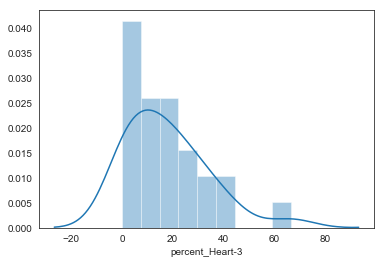

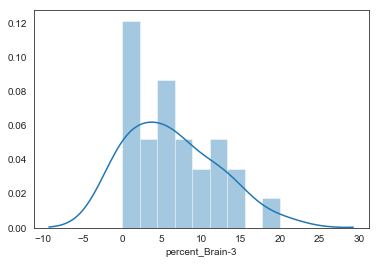

In [12]:
# try binning into no evidence, low, medium, high
sns.distplot(xeno_df['percent_Heart-3'],bins=9)
plt.figure()
sns.distplot(xeno_df['percent_Brain-3'],bins=9)

In [14]:
# set heart bins, based on distribution of percent frogs with severe heart phenos
print(sum(xeno_df['percent_Heart-3']==0))
print(sum(xeno_df['percent_Heart-3']<10))
print(sum(xeno_df['percent_Heart-3']<20))

# set brain bins, based on distribution of percent frogs with severe brain phenos
print(sum(xeno_df['percent_Brain-3']==0))
print(sum(xeno_df['percent_Brain-3']<5))
print(sum(xeno_df['percent_Brain-3']<10))


xeno_df['heart_binned']=3
xeno_df['heart_binned'][xeno_df['percent_Heart-3']<20]=2
xeno_df['heart_binned'][xeno_df['percent_Heart-3']<10]=1
xeno_df['heart_binned'][xeno_df['percent_Heart-3']==0]=0
xeno_df.head()

xeno_df['brain_binned']=3
xeno_df['brain_binned'][xeno_df['percent_Brain-3']<10]=2
xeno_df['brain_binned'][xeno_df['percent_Brain-3']<5]=1
xeno_df['brain_binned'][xeno_df['percent_Brain-3']==0]=0
xeno_df.head()

4
9
16
7
11
19


/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import k

,Column1,Gene Name,sgRNA Efficiency (Mean),sgRNA Efficiency (StDev),sgRNA_notes,percent_Heart-0,percent_Heart-1,percent_Heart-2,percent_Heart-3,n (Heart),percent_Brain-0,percent_Brain-1,percent_Brain-2,percent_Brain-3,n (Brain),brain_predicted,heart_predicted,heart_binned,brain_binned
Gene Name,,,,,,,,,,,,,,,,,,,
AGAP1,68,AGAP1,22.65,18.35,NaN,20.00,40.0,40.00,0.00,10.0,16.00,36.00,40.00,8.00,25,1.0,0.0,0,2
ANKRD11,69,ANKRD11,44.97,30.54,NaN,92.50,2.5,2.50,2.50,40.0,35.59,35.59,22.03,6.78,59,1.0,1.0,1,2
CAPN12,70,CAPN12,66.19,24.93,NaN,30.00,60.0,0.00,10.00,10.0,44.44,40.74,14.81,0.00,27,1.0,0.0,2,0
CDK13,71,CDK13,52.60,12.38,NaN,73.33,20.0,6.67,0.00,15.0,26.32,44.74,26.32,2.63,38,1.0,1.0,0,1
CREBBP,73,CREBBP,NaN,NaN,pending,16.67,0.0,16.67,66.67,6.0,0.00,40.00,40.00,20.00,5,1.0,1.0,3,3


In [15]:
xeno_df['brain_binned'].value_counts()

2    8
3    7
0    7
1    4
Name: brain_binned, dtype: int64

Text(0.5,48.0677,'')

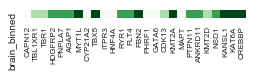

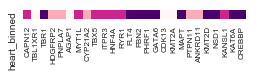

In [16]:
plt.figure(figsize=(4,2))
hfig=sns.heatmap(xeno_df[['brain_binned']].loc[order_brain+order_heart+order_both].T,cmap='Greens',square=True,
            xticklabels=1,cbar=False)

plt.xticks(fontsize=8)
plt.xlabel('')
# plt.savefig('../../manuscript/figures_1911/Figure5/brain_binned.png')
# plt.savefig('../../manuscript/figures_1911/Figure5/brain_binned.svg')
# plt.savefig('../../manuscript/figures_1911/Figure5/brain_binned.pdf')

plt.figure(figsize=(4,2))
hfig=sns.heatmap(xeno_df[['heart_binned']].loc[order_brain+order_heart+order_both].T,cmap='RdPu',square=True,
            xticklabels=1,cbar=False)
plt.xticks(fontsize=8)
plt.xlabel('')
# plt.savefig('../../manuscript/figures_1911/Figure5/heart_binned.png')
# plt.savefig('../../manuscript/figures_1911/Figure5/heart_binned.svg')
# plt.savefig('../../manuscript/figures_1911/Figure5/heart_binned.pdf')